<a href="https://colab.research.google.com/github/Suphattha/KKU_data_mining/blob/master/Kmean_Clustering_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Generate Data

In [17]:
from sklearn.datasets import make_blobs

In [18]:
x,y=make_blobs(n_samples=300,centers=3,n_features=2,random_state=6)

In [19]:
x.shape

(300, 2)

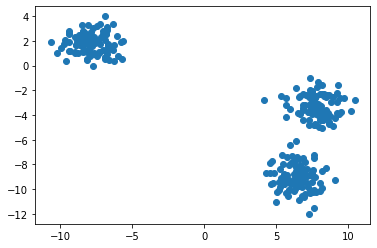

In [20]:
from matplotlib import pyplot as plt
plt.scatter(x[:,0,],x[:,1])

##Import

In [21]:
from sklearn.cluster import KMeans

##Define

In [22]:
KMclust=KMeans(n_clusters=5)

##Train

In [23]:
KMclust.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Predict

In [24]:
label=KMclust.predict(x)

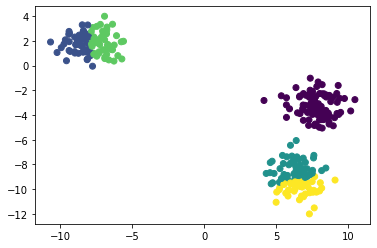

In [25]:
plt.scatter(x[:,0],x[:,1],c=label)

##Color quantization(appication of kmean)

In [28]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/DWDM_material'

Mounted at /content/drive


In [29]:
import cv2
import os

In [33]:
img=cv2.imread(os.path.join(path,'5571399.jpg'))

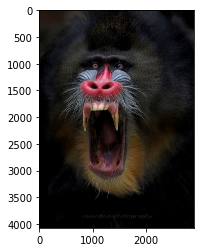

In [34]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [35]:
RGB_img.shape

(4074, 2904, 3)

##Count unique colors

In [36]:
import numpy as np

In [37]:
np.unique(RGB_img).shape

(256,)

##Use K-mean to reduce color from 256 colors to 8 colors

In [41]:
#Define
myQuantize=KMeans(n_clusters=8)

In [42]:
img_row=np.reshape(RGB_img,(4074*2904,3))
img_row

array([[33, 20, 12],
       [33, 20, 12],
       [34, 21, 13],
       ...,
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0]], dtype=uint8)

In [46]:
#Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
#Predict
res=myQuantize.predict(img_row)

In [48]:
res

array([5, 5, 5, ..., 2, 2, 2], dtype=int32)

In [50]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[ 35.81454801,  32.38720228,  30.41772842],
       [131.30780412, 120.71346923, 124.19338023],
       [  2.10038934,   1.67945262,   1.79661431],
       [100.97595202,  75.56672693,  61.67975796],
       [ 62.75140352,  51.06929106,  43.39059704],
       [ 19.06379069,  16.50272498,  15.58469076],
       [181.79076191,  74.64218028,  91.71416691],
       [189.7600582 , 161.7802242 , 175.91153744]])

In [51]:
Clus_cen.shape

(8, 3)

##Map colors name back to imge

In [ ]:
new_img=np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
      new_img[i,j,:]=Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [56]:
new_img_=new_img/255

NameError: ignored

In [ ]:
plt.imshow(new_img_)